###  PROBLEM STATEMENT:	Perform clustering for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained. Refer to EastWestAirlines.xlsx dataset.

### Business objective(s): Maximize Profit
### Business constraint(s): Minimize time for booking

In [1]:
#Load all the required packages
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer
#display max columns
pd.set_option('display.max_columns',None)

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
#load the dataset
df=pd.read_excel(r"C:\Users\user\Downloads\Dataset_Assignment Clustering\EastWestAirlines.xlsx",sheet_name='data')

In [4]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Supress the warnings

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [41]:
df.var()

Balance                       3.442337e+09
cc1_miles                     1.896100e+00
Bonus_miles                   3.268697e+08
Bonus_trans                   8.307298e+01
Flight_miles_12mo             8.792031e+04
Flight_trans_12               8.928328e-01
Days_since_enroll             4.264257e+06
Award?                        2.332713e-01
Flight_miles_12mo_replaced    8.791229e+04
Flight_trans_12_replaced      8.927452e-01
Balanced_replaced             3.442337e+09
dtype: float64

In [7]:
# ID isn't important for analysis we can drop this column
df=df.drop("ID#", axis=1 )
# we can drop qual miles since it has zero values
df.drop(['Qual_miles','cc2_miles','cc3_miles'],axis=1,inplace=True)

In [8]:
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,174,1,0,0,7000,0
1,19244,1,215,2,0,0,6968,0
2,41354,1,4123,4,0,0,7034,0
3,14776,1,500,1,0,0,6952,0
4,97752,4,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...
3994,18476,1,8525,4,200,1,1403,1
3995,64385,1,981,5,0,0,1395,1
3996,73597,3,25447,8,0,0,1402,1
3997,54899,1,500,1,500,1,1401,0


### EXPLORATORY DATA ANALYSIS / DESCRIPTIVE STATISTICS

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0
Award?,3999.0,0.370343,0.482957,0.0,0.0,0.0,1.0,1.0


### Data Preprocessing

### Handling duplicates:

In [10]:
duplicate = df.duplicated()  # Returns Boolean Series denoting duplicate rows.
duplicate
sum(duplicate)

1

In [11]:
# Removing Duplicates
df = df.drop_duplicates() # Returns DataFrame with duplicate rows removed.

### Box Plot

Visualize numeric data using boxplot for outliers

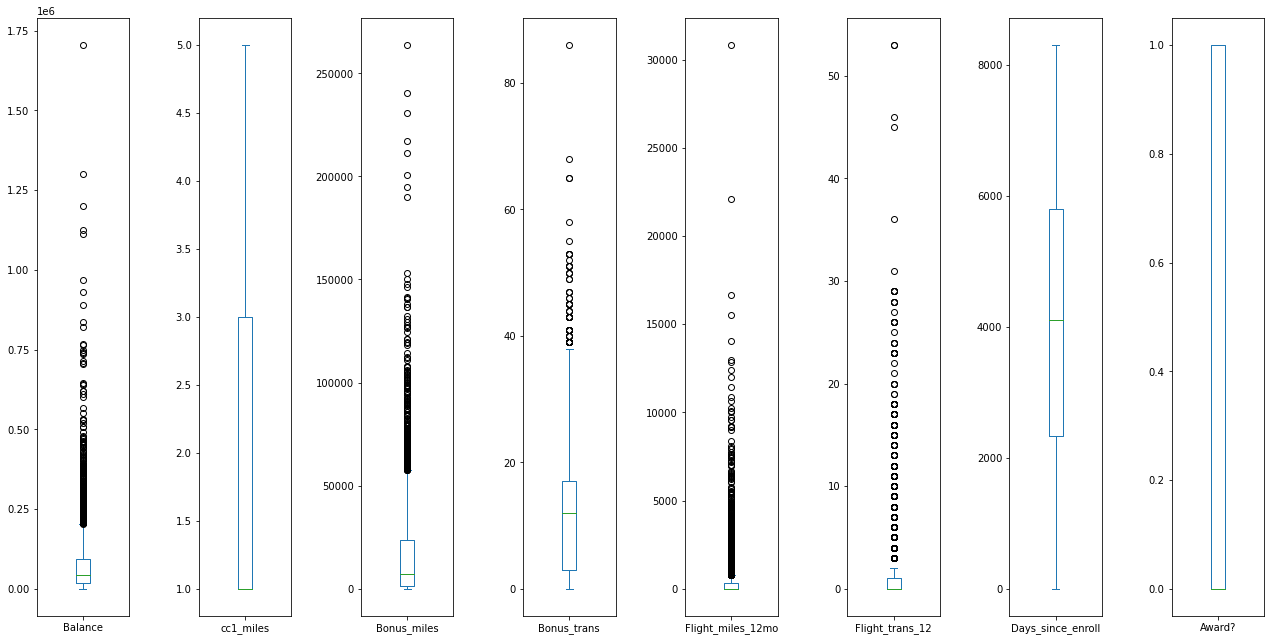

In [13]:
# Multiple boxplots in a single visualization.
# Columns with larger scales affect other columns. 
# Below code ensures each column gets its own y-axis.

# pandas plot() function with parameters kind = 'box' and subplots = True

df.plot(kind = 'box', subplots = True, sharey = False, figsize = (22, 11)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show() 

In [14]:
#Boxplots show outliers in: 
Outliers=['Balance','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12']

In [38]:
manually_outlier_treatment=['Balance','Flight_miles_12mo','Flight_trans_12']

In [39]:
#find iqr
for i in manually_outlier_treatment:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
   
    lower_limit=df[i].quantile(0.25)-(iqr*1.5)
    upper_limit=df[i].quantile(0.75)+(iqr*1.5)
    
    print(f'{i} has iqr = {iqr}')
    print(f'lower_limit is {lower_limit} and upper limit is {upper_limit}\n')

Balance has iqr = 73870.75
lower_limit is -92271.875 and upper limit is 203211.125

Flight_miles_12mo has iqr = 313.5
lower_limit is -470.25 and upper limit is 783.75

Flight_trans_12 has iqr = 1.0
lower_limit is -1.5 and upper limit is 2.5



In [19]:
## we can replace the outliers with boundary values
outliers_df=np.where(df.Flight_miles_12mo >783.75,True ,np.where(df.Flight_miles_12mo <-470.25,True,False))
outliers_df
print(sum(outliers_df))

outliers_df1=np.where(df.Flight_trans_12 >2.5,True ,np.where(df.Flight_trans_12 <-1.5,True,False))
outliers_df1
print(sum(outliers_df1))

outliers_df2=np.where(df.Balance >203211.125,True ,np.where(df.Flight_miles_12mo <-92271.875,True,False))
outliers_df2
print(sum(outliers_df2))

569
565
266


In [20]:
out = df.loc[outliers_df,'Flight_miles_12mo']
out1= df.loc[outliers_df,'Flight_trans_12']
out2= df.loc[outliers_df,'Balance']

In [21]:
print(out)
print(out1)
print(out2)

4       2077.000000
8       3850.000000
9       1150.000000
21      1800.000000
22      3450.000000
           ...     
3934    4660.741623
3946    1150.000000
3950    3950.000000
3967    1000.000000
3979    1198.000000
Name: Flight_miles_12mo, Length: 569, dtype: float64
4        4.000000
8       12.000000
9        3.000000
21       9.000000
22      11.000000
          ...    
3934     1.000000
3946     4.000000
3950    12.753268
3967     7.000000
3979     3.000000
Name: Flight_trans_12, Length: 569, dtype: float64
4        97752.000000
8       375926.852576
9       104860.000000
21      185681.000000
22       20584.000000
            ...      
3934     76595.000000
3946    139032.000000
3950     59650.000000
3967     26504.000000
3979     57793.000000
Name: Balance, Length: 569, dtype: float64


In [22]:
#winsorization
df['Flight_miles_12mo_replaced']=pd.DataFrame(np.where(df.Flight_miles_12mo >783.75,783.75 ,np.where(df.Flight_miles_12mo<-470.25,-470.25,df.Flight_miles_12mo)))
df['Flight_trans_12_replaced']=pd.DataFrame(np.where(df.Flight_trans_12 >2.5,2.5 ,np.where(df.Flight_trans_12<-1.5,-1.5,df.Flight_trans_12)))
df['Balanced_replaced']=pd.DataFrame(np.where(df.Balance >203211.125,203211.125 ,np.where(df.Balance<-92271.875,-92271.875,df.Balance)))
df

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Flight_miles_12mo_replaced,Flight_trans_12_replaced,Balanced_replaced
0,28143.0,1,174.0,1.0,0.0,0.0,7000,0,0.00,0.0,28143.0
1,19244.0,1,215.0,2.0,0.0,0.0,6968,0,0.00,0.0,19244.0
2,41354.0,1,4123.0,4.0,0.0,0.0,7034,0,0.00,0.0,41354.0
3,14776.0,1,500.0,1.0,0.0,0.0,6952,0,0.00,0.0,14776.0
4,97752.0,4,43300.0,26.0,2077.0,4.0,6935,1,783.75,2.5,97752.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,1,8525.0,4.0,200.0,1.0,1403,1,0.00,0.0,64385.0
3995,64385.0,1,981.0,5.0,0.0,0.0,1395,1,0.00,0.0,73597.0
3996,73597.0,3,25447.0,8.0,0.0,0.0,1402,1,500.00,1.0,54899.0
3997,54899.0,1,500.0,1.0,500.0,1.0,1401,0,0.00,0.0,3016.0


<AxesSubplot:xlabel='Flight_miles_12mo_replaced'>

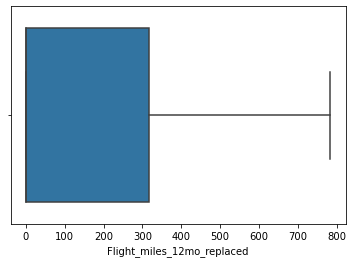

In [23]:
sns.boxplot(df.Flight_miles_12mo_replaced)


<AxesSubplot:xlabel='Flight_trans_12_replaced'>

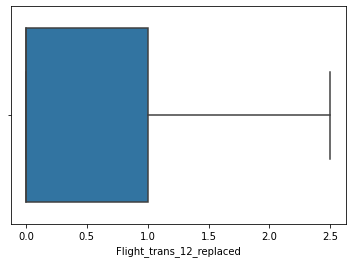

In [24]:
sns.boxplot(df.Flight_trans_12_replaced)

<AxesSubplot:xlabel='Balanced_replaced'>

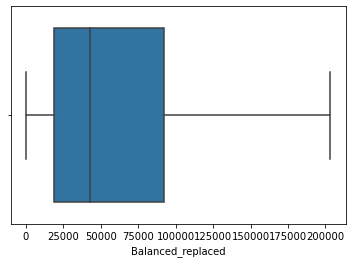

In [25]:
sns.boxplot(df.Balanced_replaced)

In [46]:
df.drop(['Balance','Flight_miles_12mo','Flight_trans_12'], axis=1,inplace=True)

## MISSING VALUE ANALYSIS
### IMPUTATION:

The process of dealing with missing values is called Imputation.

Most popular substitution based Imputation techniques are:

1) Mean imputation for numeric data

2) Mode imputation for non-numeric data

In [47]:
df.isnull().sum() # Check for missing values

cc1_miles                     0
Bonus_miles                   0
Bonus_trans                   0
Days_since_enroll             0
Award?                        0
Flight_miles_12mo_replaced    0
Flight_trans_12_replaced      0
Balanced_replaced             0
dtype: int64

In [48]:
df.fillna(df.mean(), inplace = True)

### Winsorization

In [49]:
for i in Outliers:
    winsor = Winsorizer(capping_method = 'iqr', # choose gaussian rule boundary
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = [i])
    df[i] = winsor.fit_transform(df[[i]]) # this is replacing the outliers to cap values

KeyError: "None of [Index(['Balance'], dtype='object')] are in the [columns]"

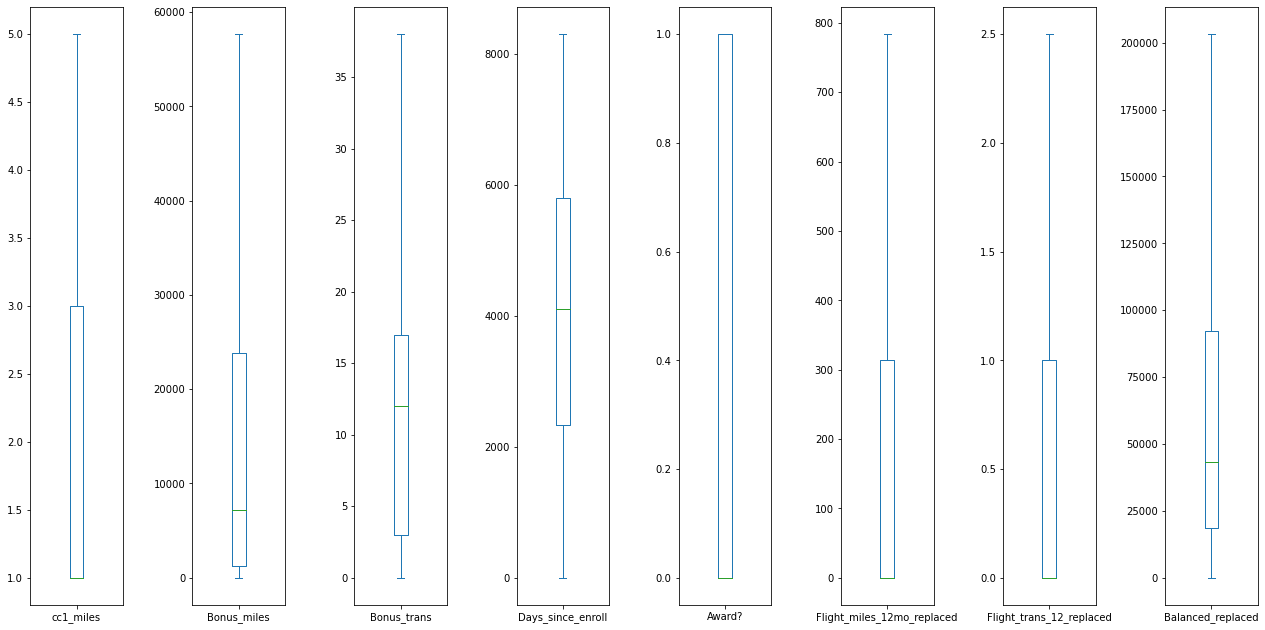

In [50]:
#verifying outliers treatment

df.plot(kind = 'box', subplots = True, sharey = False, figsize = (22, 11)) 

'''sharey True or 'all': x- or y-axis will be shared among all subplots.
False or 'none': each subplot x- or y-axis will be independent.'''


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show() 

### Scaling using Normalization:
The scale/magnitude of the data will be converted to min = 0 and max = 1

In [53]:
def norm_func(i):
    x =(i - i.min()) / (i.max() - i.min())
    return(x)

In [54]:
df_norm = norm_func(df)

In [57]:
df_norm.describe().T

,count,mean,std,min,25%,50%,75%,max
cc1_miles,3998.0,0.264945,0.344247,0.0,0.000000,0.000000,0.500000,1.0
Bonus_miles,3998.0,0.267405,0.313598,0.0,0.021682,0.124593,0.413009,1.0
Bonus_trans,3998.0,0.301934,0.239854,0.0,0.078947,0.315789,0.447368,1.0
Days_since_enroll,3998.0,0.496406,0.248976,0.0,0.280836,0.493791,0.697944,1.0
Award?,3998.0,0.370435,0.482982,0.0,0.000000,0.000000,1.000000,1.0
Flight_miles_12mo_replaced,3998.0,0.228433,0.378309,0.0,0.000000,0.000000,0.400000,1.0
Flight_trans_12_replaced,3998.0,0.236728,0.377941,0.0,0.000000,0.000000,0.400000,1.0
Balanced_replaced,3998.0,0.313880,0.288722,0.0,0.091207,0.212282,0.454724,1.0


### CLUSTERING MODEL BUILDING

### KMeans Clustering

In [58]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [59]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS

[2543.188018713196,
 1897.3594824983445,
 1577.0913644041361,
 1320.8573166735264,
 1143.5745265899059,
 998.7174851349971,
 924.8676269365077]

### Creating a scree plot to find out no.of cluster

Text(0, 0.5, 'total_within_SS')

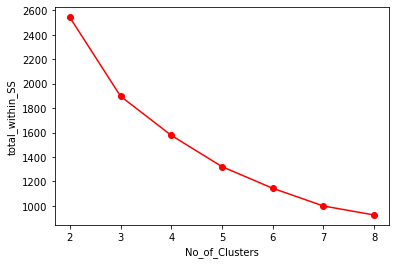

In [60]:
plt.plot(k, TWSS, 'ro-'); plt.xlabel("No_of_Clusters"); plt.ylabel("total_within_SS")

### Detecting the best k=3 using TWSS value from scree plot

In [61]:
model = KMeans(n_clusters = 3)
yy = model.fit(df_norm)

We can see labels of cluster

In [62]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [63]:
mb = pd.Series(model.labels_)

In [64]:
df['clust'] = mb # creating a  new column and assigning it to new column 

In [65]:
df.head()

,cc1_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?,Flight_miles_12mo_replaced,Flight_trans_12_replaced,Balanced_replaced,clust
0,1,174.0,1.0,7000,0,0.00,0.0,28143.0,0.0
1,1,215.0,2.0,6968,0,0.00,0.0,19244.0,0.0
2,1,4123.0,4.0,7034,0,0.00,0.0,41354.0,0.0
3,1,500.0,1.0,6952,0,0.00,0.0,14776.0,0.0
4,4,43300.0,26.0,6935,1,783.75,2.5,97752.0,2.0


### Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [66]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [67]:
silhouette_coefficients

[[2, 0.3545793687694787],
 [3, 0.37390176533398933],
 [4, 0.3474715565844832],
 [5, 0.3654931385828821],
 [6, 0.37943127010076794],
 [7, 0.3864388262927466],
 [8, 0.29945357775889525],
 [9, 0.3008355921460534],
 [10, 0.28629466706869944]]